### Estudiante: Ana Maria Arcila
#### cc. 1005896770

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

## A)

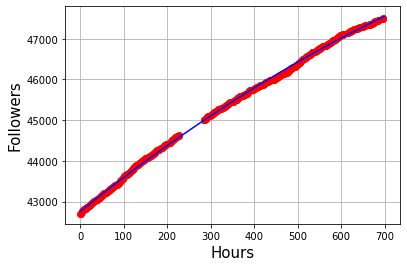

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import optimize

df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json") #se lee el json.

#polyfit para los datos del DataFrame, se escoge grado 2 ya que la gráfica se considera lo suficientemente precisa.
coeffs = np.polyfit(df.hours, df.followers, 2) 
x=np.linspace(0,700)

#Gráfico con los datos dados por el polyfit.
P=np.poly1d(coeffs)
plt.plot(df.hours, df.followers,'ro')
plt.ylabel('Followers', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.plot(x,P( x),'b-')
plt.grid()

Aquí se deriva lo que nos dio con la interpolación para encontrar la velocidad del incremento de los suscriptores.

In [2]:
v = P.deriv()
print(v)

 
-0.004875 x + 8.552


La velocidad inicial es la que se da cuando el tiempo es cero, por lo que se encuentra al hacer v(0).

In [3]:
print('La velocidad inicial de interpolación es', v(0), 'followers/hour')

La velocidad inicial de interpolación es 8.552137792664094 followers/hour


Se deriva una vez más para sacar la aceleración, y como la interpolación era de grado 2, esta aceleración será constante.

In [4]:
a = v.deriv()
print('La aceleración constante es de', a, 'followers/hour**2')

La aceleración constante es de  
-0.004875 followers/hour**2


Para el número máximo de seguidores, se tiene que ver cuándo la velocidad en la que se suscriben llegue a cero, por lo que se procede a encontrar la raíz de la función v.

In [5]:
xf = optimize.newton(v, 7500)
print('La velocidad llega a cero en la posicion: ', xf)

La velocidad llega a cero en la posicion:  1754.1931385699195


Se evalúa este $x_{f}$ en la ecuación de posición para obtener las horas que se tomaría en llegar a este x o número de seguidores.

In [6]:
hmax = P(xf)
print('El perfil dejará de ganar seguidores en la hora : ', hmax)

El perfil dejará de ganar seguidores en la hora :  50262.13672901219


Se añade el tiempo que se toma a la primera fecha, ya que es a partir de esta que se están contando las horas para llegar al $x_{f}$.

In [7]:
print('La fecha en la que se alcanza este máximo es: ', df.date_time[0] + datetime.timedelta(hours = hmax))

La fecha en la que se alcanza este máximo es:  2027-04-30 04:15:05.892444


## B)

In [8]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

#Se gace el arreglo de los ángulos
α = np.deg2rad(np.arange(0, 91, 1))

def C(x):
    """
    Función para hacer cada una de las funciones que se quieren integrar al variar α.
    """
    Cociente = []
    for i in x:
        F = lambda ϕ: 2 / (np.pi*(1 - np.sin(i/2)**2 * np.sin(ϕ)**2)**0.5)
        Cociente.append(integrate.quad(F, 0, np.pi/2)[0])
    return Cociente
    
#Dataframe de los resultados en grados, radianes y el cociente que se obtuvo
df_ = pd.DataFrame({'α_Grad': np.arange(0, 91, 1), 'α_Rad': α, 'Cociente': C(α)})
df_

,α_Grad,α_Rad,Cociente
0,0,0.000000,1.000000
1,1,0.017453,1.000019
2,2,0.034907,1.000076
3,3,0.052360,1.000171
4,4,0.069813,1.000305
...,...,...,...
86,86,1.500983,1.162214
87,87,1.518436,1.166617
88,88,1.535890,1.171105
89,89,1.553343,1.175679


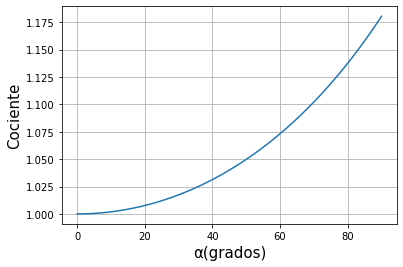

In [9]:
#gráfico del cociente Vs. α en grados.
plt.plot(df_.α_Grad, df_.Cociente)
plt.ylabel('Cociente', fontsize = 15)
plt.xlabel('α(grados)', fontsize = 15)
plt.grid()

Cuando $\alpha$ = 0, en la integral bien comportada se puede ver que su denominador se vuelve uno, lo que nos deja la siguiente ecuación:

$$T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{1}$$

$$T=\frac{2 T_{0}}{\pi} \phi\big|_{0}^{\frac{\pi}{2}}$$

$$T=\frac{2 T_{0}}{\pi} \frac{\pi}{2}$$

$$T=T_{0}$$

En vista de que desde GitHub no está mostrando la mayoría de las ecuaciones hechas con Latex, se adjunta una imagen de las ecuaciones:

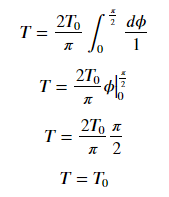

Lo que da 1 de cociente. Eso es lo que se puede ver en la gráfica cuando el ángulo tiende a cero.